In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [35]:
df = pd.read_csv('DataHousePriceFull.csv')
df = df.drop(['Địa chỉ', 'Ngày đăng'], axis = 1)
df = df[df['Giá nhà'] < 30000000000]
df = df[df['Giá nhà'] > 100000000]
df = df[df['Phòng ngủ'] < 8]
df = df[df['Phòng tắm'] < 8]
df = df[df['Diện tích'] < 200]


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28408 entries, 0 to 29229
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Mã BĐS     28408 non-null  int64  
 1   Mã ĐVHC    28408 non-null  int64  
 2   Diện tích  28408 non-null  float64
 3   Phòng ngủ  28408 non-null  int64  
 4   Phòng tắm  28408 non-null  int64  
 5   Pháp lý    28408 non-null  int64  
 6   Giá nhà    28408 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 1.7 MB


In [37]:
X = df.drop(['Giá nhà'], axis = 1)
y = df['Giá nhà']

In [38]:
data_linear_regression = df.copy()
data_linear_regression

,Mã BĐS,Mã ĐVHC,Diện tích,Phòng ngủ,Phòng tắm,Pháp lý,Giá nhà
0,22024930,777,55.0,2,2,2,790000000
1,21994903,3,36.0,1,1,2,680000000
2,22038025,777,60.0,2,2,2,780000000
3,22031736,776,75.0,2,2,3,2450000000
4,22024813,777,75.0,2,2,2,790000000
...,...,...,...,...,...,...,...
29224,21411974,3,136.0,3,5,2,4081000000
29226,21411860,21,89.0,3,2,2,3300000000
29227,21412011,21,124.0,3,2,2,4511000000
29228,21411990,761,60.0,3,2,2,2400000000


In [39]:
X = data_linear_regression[["Phòng tắm", "Phòng ngủ", "Diện tích"]].to_numpy()
Y = data_linear_regression["Giá nhà"].to_numpy()

In [40]:
#Tạo hàm phân tách dữ liệu thành 2 phần là tập train và tập test
def data_train_test_split(data1, data2, train_size):
    x_train_size = int(np.ceil(train_size * len(data1)))
    y_train_size = int(np.ceil(train_size * len(data2)))
    x_train = data1[0:x_train_size]
    x_test = data1[x_train_size:len(data1)]
    y_train = np.array([data2[0:y_train_size]])
    y_test = np.array([data2[y_train_size:len(data2)]])
    return x_train, y_train, x_test, y_test

In [41]:

train_data['Phòng tắm'] = np.log(train_data['Phòng tắm']+1)
train_data['Phòng ngủ'] = np.log(train_data['Phòng ngủ']+1)
train_data['Giá nhà'] = np.log(train_data['Giá nhà']+1)
train_data.hist(figsize=(10,8))
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap="YlGnBu")

NameError: name 'train_data' is not defined

In [ ]:
#Tạo hàm tính toán hệ số w
def linear_regression(x_arr, y_label):
    arr_ones = np.ones((x_arr.shape[0], 1))
    xbar = np.hstack((arr_ones, x_arr))
    y_arr = y_label.T
    A = np.dot(xbar.T, xbar)
    B = np.dot(xbar.T, y_arr)
    w = np.dot(np.linalg.pinv(A), B)
    return w

In [ ]:
#Tạo hàm dự đoán cho 1 tập dữ liệu bất kỳ
def predict_regression(x_arr_test, w_coffecient):
    arr_ones = np.ones((x_arr_test.shape[0], 1))
    xbar_test = np.hstack((arr_ones, x_arr_test))
    y_predict = np.dot(xbar_test, w_coffecient)
    return y_predict

In [ ]:
x_train, y_train, x_test, y_test = data_train_test_split(X, Y, 0.8)
w = linear_regression(x_train, y_train)
print("Hệ số w cần tìm:")
for i in range(len(w)):
    print("w" + str(i) + " = " + str(w[i][0]))
print(type(x_test))

Hệ số w cần tìm:
w0 = -1403572872.2383804
w1 = -29341424.853294373
w2 = -82730563.38261414
w3 = 61673040.67295694
<class 'numpy.ndarray'>


In [ ]:
ytest_pred = predict_regression(x_test, w)
ytest_pred

array([[5.19565482e+08],
       [5.19565482e+08],
       [3.34546360e+08],
       ...,
       [5.93700963e+09],
       [1.98993503e+09],
       [3.22339584e+09]])

In [ ]:
ytest_predT = ytest_pred.T
lst_ytest_ytestpred = []
for i in range(len(ytest_predT[0])):
    lst_ytest_ytestpred.append([ytest_predT[0][i], y_test[0][i]])
lst_ytest_ytestpred.sort(key = lambda x: x[0])
lst_ytestpred = [lst_ytest_ytestpred[i][0] for i in range(len(lst_ytest_ytestpred))]
lst_ytest = [lst_ytest_ytestpred[i][1] for i in range(len(lst_ytest_ytestpred))]
lst_unit = [i for i in range(len(ytest_pred))]

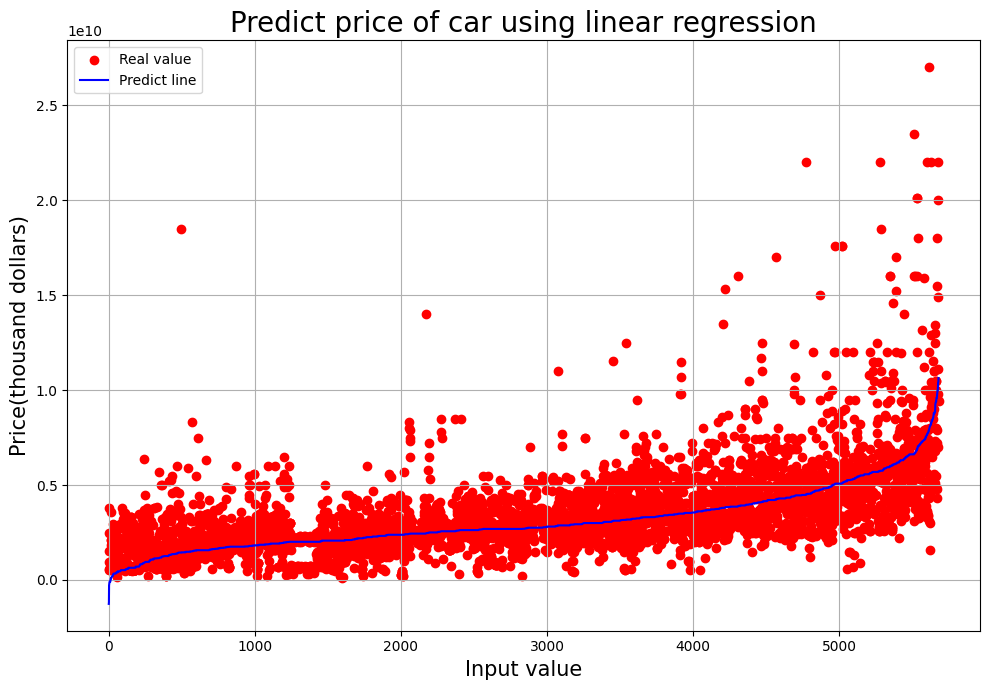

In [ ]:
plt.figure(figsize = (10, 7))
plt.scatter(lst_unit, lst_ytest, color = "red", label = "Real value")
plt.plot(lst_unit, lst_ytestpred, color = "blue", label = "Predict line")
plt.title("Predict price of car using linear regression", fontsize = 20)
plt.ylabel("Price(thousand dollars)", fontsize = 15)
plt.xlabel("Input value", fontsize = 15)
plt.grid()
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

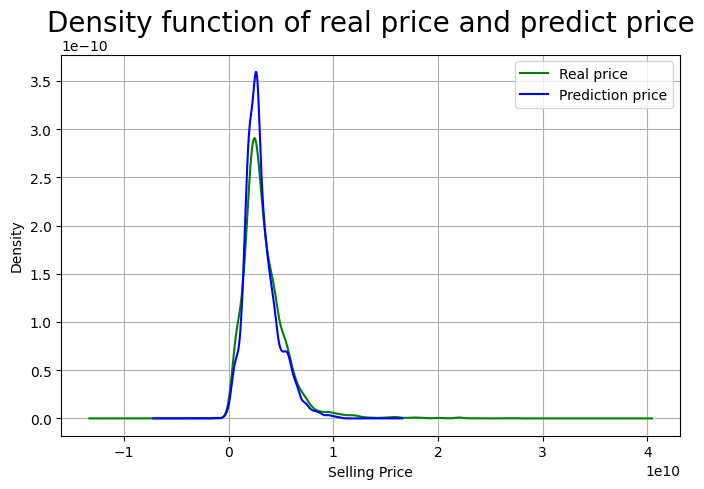

In [ ]:
seri_real = pd.Series(y_test[0])
seri_predict = pd.Series(ytest_predT[0])
plt.figure(figsize = (7, 5))
seri_real.plot.density(color = "green")
seri_predict.plot.density(color = "blue")
plt.xlabel("Selling Price")
plt.title("Density function of real price and predict price", fontsize = 20)
plt.legend(["Real price", "Prediction price"], loc = "upper right")
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
ytrain_pred = predict_regression(x_train, w)

In [ ]:
ytrain_predT = ytrain_pred.T
lst_ytrain_ytrainpred = []
for i in range(len(ytrain_predT[0])):
    lst_ytrain_ytrainpred.append([ytrain_predT[0][i], y_train[0][i]])
lst_ytrain_ytrainpred.sort(key = lambda x: x[0])
lst_ytrainpred = [lst_ytrain_ytrainpred[i][0] for i in range(len(lst_ytrain_ytrainpred))]
lst_ytrain = [lst_ytrain_ytrainpred[i][1] for i in range(len(lst_ytrain_ytrainpred))]
lst_unit_train = [i for i in range(len(ytrain_pred))]

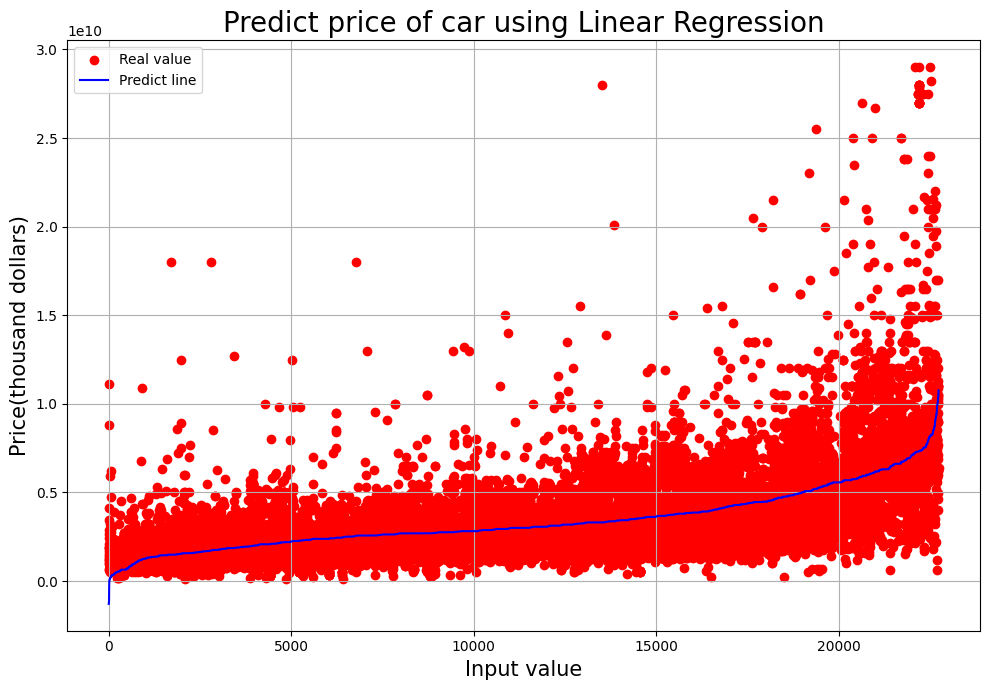

In [ ]:
plt.figure(figsize = (10, 7))
plt.scatter(lst_unit_train, lst_ytrain, color = "red", label = "Real value")
plt.plot(lst_unit_train, lst_ytrainpred , color = "blue", label = "Predict line")
plt.title("Predict price of car using Linear Regression", fontsize = 20)
plt.ylabel("Price(thousand dollars)", fontsize = 15)
plt.xlabel("Input value", fontsize = 15)
plt.grid()
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

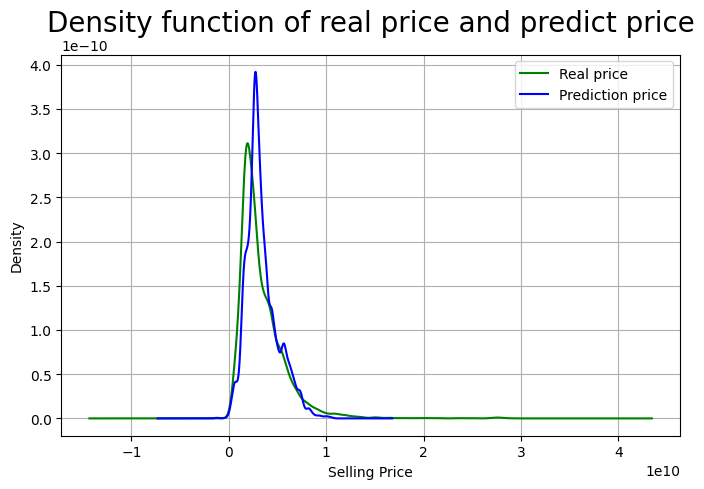

In [ ]:
seri_real = pd.Series(y_train[0])
seri_predict = pd.Series(ytrain_predT[0])
plt.figure(figsize = (7, 5))
seri_real.plot.density(color = "green")
seri_predict.plot.density(color = "blue")
plt.xlabel("Selling Price")
plt.title("Density function of real price and predict price", fontsize = 20)
plt.legend(["Real price", "Prediction price"], loc = "upper right")
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
import array as arr
arr = np.array([[2,2,400]])
y = predict_regression(arr,w)
y

array([[2.30414994e+10]])